## Analysis of Used Cars on German eBay

The purpose of this notebook is to practice cleaning data using the `Pandas` library. 

The dataset includes 50,000 vehicles scrabed from the German eBay marketplace, _eBay Kleinanzeigen_. Many of the columns contain 'dirty' data.

The dataset was originally scraped and uploaded to Kaggle by user orgesleka.

The original dataset isn't available on Kaggle anymore, but you can find it [here](https://data.world/data-society/used-cars-data).

#### Columns
- `dateCrawled` - When this ad was first crawled. All field-values are taken from this date.
- `name` - Name of the car.
- `seller` - Whether the seller is private or a dealer.
- `offerType` - The type of listing
- `price` - The price on the ad to sell the car.
- `abtest` - Whether the listing is included in an A/B test.
- `vehicleType` - The vehicle Type.
- `yearOfRegistration` - The year in which the car was first registered.
- `gearbox` - The transmission type.
- `powerPS` - The power of the car in PS.
- `model` - The car model name.
- `kilometer` - How many kilometers the car has driven.
- `monthOfRegistration` - The month in which the car was first registered.
- `fuelType` - What type of fuel the car uses.
- `brand` - The brand of the car.
- `notRepairedDamage` - If the car has a damage which is not yet repaired.
- `dateCreated` - The date on which the eBay listing was created.
- `nrOfPictures` - The number of pictures in the ad.
- `postalCode` - The postal code for the location of the vehicle.
- `lastSeenOnline` - When the crawler saw this ad last online.

In [120]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [106]:
df = pd.read_csv('autos.csv', encoding='Latin-1')

In [107]:
df.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21


In [109]:
df.describe(include='all')

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
count,371528,371528,371528,371528,3.715280e+05,371528,333659,371528.000000,351319,371528.000000,351044,371528.000000,371528.000000,338142,371528,299468,371528,371528.0,371528.00000,371528
unique,280500,233531,2,2,NaN,2,8,NaN,2,NaN,251,NaN,NaN,7,40,2,114,NaN,NaN,182806
top,2016-03-24 14:49:47,Ford_Fiesta,privat,Angebot,NaN,test,limousine,NaN,manuell,NaN,golf,NaN,NaN,benzin,volkswagen,nein,2016-04-03 00:00:00,NaN,NaN,2016-04-07 06:45:59
freq,7,657,371525,371516,NaN,192585,95894,NaN,274214,NaN,30070,NaN,NaN,223857,79640,263182,14450,NaN,NaN,17
mean,NaN,NaN,NaN,NaN,1.729514e+04,NaN,NaN,2004.577997,NaN,115.549477,NaN,125618.688228,5.734445,NaN,NaN,NaN,NaN,0.0,50820.66764,NaN
std,NaN,NaN,NaN,NaN,3.587954e+06,NaN,NaN,92.866598,NaN,192.139578,NaN,40112.337051,3.712412,NaN,NaN,NaN,NaN,0.0,25799.08247,NaN
min,NaN,NaN,NaN,NaN,0.000000e+00,NaN,NaN,1000.000000,NaN,0.000000,NaN,5000.000000,0.000000,NaN,NaN,NaN,NaN,0.0,1067.00000,NaN
25%,NaN,NaN,NaN,NaN,1.150000e+03,NaN,NaN,1999.000000,NaN,70.000000,NaN,125000.000000,3.000000,NaN,NaN,NaN,NaN,0.0,30459.00000,NaN
50%,NaN,NaN,NaN,NaN,2.950000e+03,NaN,NaN,2003.000000,NaN,105.000000,NaN,150000.000000,6.000000,NaN,NaN,NaN,NaN,0.0,49610.00000,NaN
75%,NaN,NaN,NaN,NaN,7.200000e+03,NaN,NaN,2008.000000,NaN,150.000000,NaN,150000.000000,9.000000,NaN,NaN,NaN,NaN,0.0,71546.00000,NaN


Most columns are of the `Object` type, indicating they are strings.

There are a few text columns where nearly all of the values are identical:
`seller`, `offerType` and `nrOfPictures`. How many unique values are in the latter column?

In [112]:
df['nrOfPictures'].value_counts()

0    371528
Name: nrOfPictures, dtype: int64

Every row in `nrOfPictures` has a value of 0. Let's drop these three columns.

In [113]:
df.drop(['seller', 'offerType', 'nrOfPictures'], axis=1, inplace=True)

### Data Observations
Several rows are missing data, including `vehicleType`, `gearbox`, `model`, `fuelType`, `notRepairedDamage`.

Column names are in camelCase.

`notRepairedDamage` is in German, so 'ja' and 'nein' should just be converted to True or False. 
`name` can be split, using `str.split()` and diverted into multiple columns.

In [114]:
cols = df.columns
cols

Index(['dateCrawled', 'name', 'price', 'abtest', 'vehicleType',
       'yearOfRegistration', 'gearbox', 'powerPS', 'model', 'kilometer',
       'monthOfRegistration', 'fuelType', 'brand', 'notRepairedDamage',
       'dateCreated', 'postalCode', 'lastSeen'],
      dtype='object')

In [115]:
new_cols = ['date_crawled', 'name', 'price', 'abtest',
       'vehicle_type', 'registration_year', 'gearbox', 'powerPS', 'model',
       'odometer_km', 'registration_month', 'fuel_type', 'brand',
       'unrepaired_damage', 'ad_created', 'postal_code',
       'last_seen']

In [116]:
df.columns = new_cols
df.head()

,date_crawled,name,price,abtest,vehicle_type,registration_year,gearbox,powerPS,model,odometer_km,registration_month,fuel_type,brand,unrepaired_damage,ad_created,postal_code,last_seen
0,2016-03-24 11:52:17,Golf_3_1.6,480,test,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN,2016-03-24 00:00:00,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,18300,test,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja,2016-03-24 00:00:00,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN,2016-03-14 00:00:00,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,60437,2016-04-06 10:17:21


All of the columns have now been renamed, using snakecase. Columns that had unclear names (such as 'dateCreated') have also been swapped with clearer names.

### Exploring Odometer and Price

In [80]:
print(f"Number of unique values: {df['price'].unique().shape[0]}")
df['price'].describe()

Number of unique values: 5597


count    3.715280e+05
mean     1.729514e+04
std      3.587954e+06
min      0.000000e+00
25%      1.150000e+03
50%      2.950000e+03
75%      7.200000e+03
max      2.147484e+09
Name: price, dtype: float64

Some cars are priced at 0 Euros, which probably doesn't make sense. Other cars are valued at billions of Euros.

In [129]:
df['price'].value_counts().sort_index(ascending=True).head(20)
# About 3 percent of listings have '0' as the price.

0     10778
1      1189
2        12
3         8
4         1
5        26
7         3
8         9
9         8
10       84
11        5
12        8
13        7
14        5
15       27
16        2
17        5
18        3
19        3
20       51
Name: price, dtype: int64

Let's remove all cars NOT priced between 50 and 250,000 Euros.

In [130]:
df = df[df['price'].between(50, 350000)]

#### Filtering Kilometer Column

In [132]:
print(f"Number of unique values: {df['odometer_km'].unique().shape[0]}")
df['odometer_km'].describe()

Number of unique values: 13


count    358984.000000
mean     125775.884162
std       39656.875406
min        5000.000000
25%      125000.000000
50%      150000.000000
75%      150000.000000
max      150000.000000
Name: odometer_km, dtype: float64

The values in the kilometer column seem reasonable; I will not filter them.

### Exploring Date Columns

- `date_crawled`: added by the crawler
- `last_seen`: added by the crawler
- `ad_created`: from the website
- `registration_month`: from the website
- `registration_year`: from the website

A number of these date values were crawled, while others provide metadata on the crawler used to scrape the data. Non-registration dates are stored as strings.

We will explore each column to learn more about the listings.

In [133]:
df[['date_crawled', 'last_seen', 'ad_created']][0:5]
# Non-registration columns are provided as strings; first ten values constitute a %Y-%md-%d

,date_crawled,last_seen,ad_created
0,2016-03-24 11:52:17,2016-04-07 03:16:57,2016-03-24 00:00:00
1,2016-03-24 10:58:45,2016-04-07 01:46:50,2016-03-24 00:00:00
2,2016-03-14 12:52:21,2016-04-05 12:47:46,2016-03-14 00:00:00
3,2016-03-17 16:54:04,2016-03-17 17:40:17,2016-03-17 00:00:00
4,2016-03-31 17:25:20,2016-04-06 10:17:21,2016-03-31 00:00:00


In [137]:
date_crawled_values = (df['date_crawled']
    .str[:10]
    .value_counts(normalize=True, dropna=False)
    .sort_index()
    )

<AxesSubplot:>

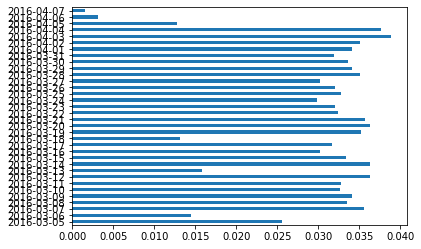

In [138]:
date_crawled_values.plot(kind='barh')

It appears that the eBay Classifieds were scraped every day over a one month period. The number of listings, on each date, is roughly consistent, albeit with a dropoff on the last three days.

<AxesSubplot:>

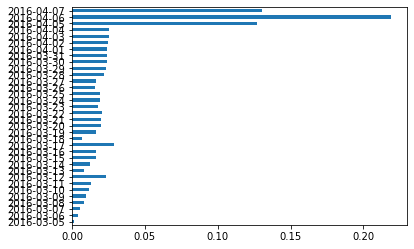

In [136]:
(df['last_seen']
    .str[:10]
    .value_counts(normalize=True, dropna=False)
    .sort_index()
    .plot(kind='barh')
    )

I'm not sure what the `last_seen` column is telling me. Perhaps the date that the crawler last saw a listing? In other words, it likely indicates the date on which the car was sold. The last three days have a huge spike in values.

In [88]:
df['last_seen'].str[:10].value_counts(normalize=True, dropna=False).sort_index()

2016-03-05    0.001268
2016-03-06    0.004101
2016-03-07    0.005193
2016-03-08    0.007923
2016-03-09    0.009826
2016-03-10    0.011461
2016-03-11    0.012957
2016-03-12    0.023242
2016-03-13    0.008416
2016-03-14    0.012177
2016-03-15    0.016317
2016-03-16    0.016434
2016-03-17    0.028728
2016-03-18    0.006889
2016-03-19    0.016347
2016-03-20    0.019871
2016-03-21    0.020044
2016-03-22    0.020534
2016-03-23    0.018041
2016-03-24    0.019178
2016-03-25    0.018986
2016-03-26    0.015955
2016-03-27    0.016679
2016-03-28    0.022198
2016-03-29    0.023284
2016-03-30    0.023724
2016-03-31    0.024265
2016-04-01    0.023947
2016-04-02    0.024983
2016-04-03    0.025343
2016-04-04    0.025543
2016-04-05    0.126892
2016-04-06    0.218861
2016-04-07    0.130394
Name: last_seen, dtype: float64

In [139]:
df['ad_created'].str[:10].value_counts(normalize=True, dropna=False).sort_index().head(20)

2014-03-10    0.000003
2015-03-20    0.000003
2015-06-11    0.000003
2015-06-18    0.000003
2015-08-07    0.000003
2015-08-10    0.000003
2015-09-04    0.000006
2015-09-09    0.000003
2015-10-14    0.000003
2015-11-02    0.000003
2015-11-08    0.000003
2015-11-10    0.000003
2015-11-12    0.000003
2015-11-13    0.000003
2015-11-17    0.000003
2015-11-23    0.000006
2015-11-24    0.000006
2015-12-05    0.000008
2015-12-06    0.000003
2015-12-17    0.000003
Name: ad_created, dtype: float64

There is a large variety of ad created dates. Most fall within 1-2 months of the listing date, but a few are quite old, with the oldest at around 9 months.

In [66]:
df['registration_year'].describe()

count    358958.000000
mean       2004.425270
std          79.795003
min        1000.000000
25%        1999.000000
50%        2004.000000
75%        2008.000000
max        9999.000000
Name: registration_year, dtype: float64

Values in the `registration_year` column have strange min() and max(). Specifically, some cares have a registration year of 1000, and others a year of 9999.

What are the highest and lowest acceptable values for the `registration_year` column?

### Dealing with Incorrect Registration Years

Because a car can't be first registered before the listing was seen, any vehicle with a registration year above 2016 is definitely inaccurate. Determining the earliest valid year is more difficult. Realistically, it could be somewhere in the first few decades of the 1900s.

In [142]:
df['registration_year'].between(1900, 2016).value_counts()

True     345091
False     13893
Name: registration_year, dtype: int64

There are 13,893 cars with registration dates that probably don't make sense. What fraction of the total is this?

In [145]:
((~df['registration_year'].between(1900, 2016)).sum() / df.shape[0]) * 100
# It's just 3.87% of the total listings.

3.870088917611927

Since cars with strange registration years constitute just 3.87% of all listings, we will remove them.

In [146]:
df = df[df['registration_year'].between(1900, 2016)]

In [151]:
df['registration_year'].value_counts(normalize=True).sort_index(ascending=False).head(10)

2016    0.026506
2015    0.008267
2014    0.013799
2013    0.017700
2012    0.027091
2011    0.034701
2010    0.035507
2009    0.044855
2008    0.046417
2007    0.050639
Name: registration_year, dtype: float64

### Exploring Price by Brand

Which brands are most popular in Germany?

In [166]:
# The top 10 brands in Germany.
brand_counts = df['brand'].value_counts(normalize=True).head(10)
brand_counts

volkswagen       0.211762
bmw              0.109768
opel             0.106343
mercedes_benz    0.096896
audi             0.089594
ford             0.068959
renault          0.047541
peugeot          0.030186
fiat             0.025715
seat             0.018685
Name: brand, dtype: float64

In [167]:
common_brands = brand_counts[brand_counts > 0.05].index

Include only those brands with at least 5% of the listings on eBay.

In [168]:
mean_price_by_brand = {}

for brand in common_brands:
    # Make sure brand matches
    brand_only = df[df['brand'] == brand]
    mean_price = brand_only['price'].mean()
    mean_price_by_brand[brand] = int(mean_price)

In [169]:
mean_price_by_brand

{'volkswagen': 5423,
 'bmw': 8495,
 'opel': 2987,
 'mercedes_benz': 8585,
 'audi': 9122,
 'ford': 3710}

BMW, Mercedes and Audi are the most expensive used cars.

Opel and Ford are the cheapest, while Volkswagen is right in the middle.

### Explore Mileage by Brand

Do brands with a higher mean mileage also have a lower mean price?

First, we calculate the mean mileage for the top brands, and store the result in a dictionary.

In [171]:
mean_km_by_brand = {}

for brand in common_brands:
    brands_only = df[df["brand"] == brand]
    mean_mileage = brands_only['odometer_km'].mean()
    mean_km_by_brand[brand] = int(mean_mileage)

In [172]:
mean_km_by_brand

{'volkswagen': 128464,
 'bmw': 132928,
 'opel': 128798,
 'mercedes_benz': 130694,
 'audi': 129504,
 'ford': 123715}

In [183]:
brands_km_df = pd.Series(data=mean_km_by_brand, dtype=int)
brands_price_df = pd.Series(data=mean_price_by_brand, dtype=int)

In [184]:
brands_df = pd.DataFrame(data=brands_price_df, columns=['mean_price'])

In [185]:
brands_df['mean_km'] = brands_km_df

In [186]:
brands_df.head()

,mean_price,mean_km
volkswagen,5423,128464
bmw,8495,132928
opel,2987,128798
mercedes_benz,8585,130694
audi,9122,129504


All the cars are entered on eBay with roughly the same average kilometers on their odometers. The price variations remain.